# Graph Data Structure and Breadth/Depth First Search of Graphs

__Note:__ To run this notebook you need to have installed the free graphviz package https://www.graphviz.org/ on your computer. This package is available for install through standard package managers such as homebrew/macports on your MAC and through apt-get/debian on linux. 

You will also need the pygraphviz python3 package installed using pip3 or anaconda.


In [13]:
pip install pygraphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
from pygraphviz import AGraph
from IPython.display import Image
from IPython.display import HTML, display


class AdjListGraph(object): 
    # We are defining a basic graph with adjacency list
    def __init__ (self, n): 
        self.__n = n # number of vertices
        self.__edges = {} # we will use a dictionary data structure for the adj list.
        # self.__edges[i] will be a list that contains all the outgoing edges from node i
        for i in range(n):
            self.__edges[i] = []
    @property
    def n(self):
        return self.__n
    
    def get_adjacent_nodes(self, vid):
        assert vid >= 0 and vid < self.n
        return self.__edges[vid]
    
    def add_edge(self, src_id, dest_id):
        self.__edges[src_id].append(dest_id)
        
    def display_graph(self):
        G = AGraph(directed=True)
        for vid in range(self.__n):
             G.add_node(vid)
        for vid in range(self.__n):
            adj_list_v = self.__edges[vid]
            print(vid, adj_list_v)
            for wid in adj_list_v:
                G.add_edge(vid, wid)
     
        G.layout(prog='dot')
        return Image(G.draw(format='png'))
        

0 [1]
1 [2, 3, 4, 5]
2 []
3 []
4 [7]
5 [6]
6 [7, 8, 9, 1]
7 []
8 []
9 [1]


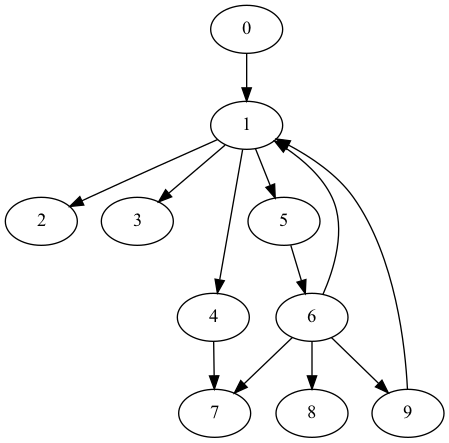

In [26]:
# Let us test graphs
myGraph = AdjListGraph(10)
myGraph.add_edge(0,1)
myGraph.add_edge(1,2)
myGraph.add_edge(1,3)
myGraph.add_edge(1,4)
myGraph.add_edge(1,5)
myGraph.add_edge(5,6)
myGraph.add_edge(4,7)
myGraph.add_edge(6,7)
myGraph.add_edge(6,8)
myGraph.add_edge(6,9)
myGraph.add_edge(6,1)
myGraph.add_edge(9,1)
display(HTML('<h2> The Graph </h2>'))
display(myGraph.display_graph())



In [27]:
# Breadth First Search of the graph
class GraphWithBFSTraversal(AdjListGraph):
    def __init__(self, n):
        AdjListGraph.__init__(self, n)
        self.__bfs_start_node = None
        self.__visited = None
        self.__depth = None
        self.__parent = None
    
    def breadth_first_search(self, s, debug=False):
        # Perform a breadth first search starting from vertex id s
        visited = [False] * self.n # Create a list of size n initialized to false
        depth = [0] * self.n # initialize all node depths to 0
        parent = [-1] * self.n # initialize all node parents to -1
        queue = [s]
        
        if debug:
            print('Starting BFS from node:', s)
        # Initialize for the starting vertex
        
        visited[s] = True
        parent[s] = s
        depth[s] = 0
        
        while len(queue) > 0:
            v_id = queue.pop(0) # Remove the vertex at the head of the queue
            if debug:
                print('Processing Node: ', v_id)
            adj_v = self.get_adjacent_nodes(v_id)
            for w_id in adj_v:
                if not visited[w_id]:
                    depth[w_id] = depth[v_id] + 1
                    parent[w_id] = v_id
                    visited[w_id] = True
                    queue.append(w_id)
                    if debug:
                        print('\t Queued node:', w_id, 'Depth = ', depth[w_id], ' parent = ', parent[w_id])
            if debug:
                print('Done processing node: ', v_id)
                print('Queue: ', queue)
        if debug:
            print('Ending BFS from node:', s)
        
        self.__visited = visited
        self.__depth = depth
        self.__parent = parent
        self.__bfs_start_node = s
        
    def get_shortest_path(self, s, t):
        if self.__bfs_start_node != s:
            print('No BFS search done starting from ', s)
            self.breadth_first_search(s)
            
        if self.__visited[t]:
            path = [t]
            cur_node = t
            while cur_node != s:
                cur_node = self.__parent[cur_node]
                path.insert(0, cur_node)
            print('Found path:')
            for node in path:
                print(node, end=' ')
            print()
            return path
        else:
            print('No path from ', s, ' to ', t)
            return []
            
            

0 [1]
1 [2, 3, 4, 5]
2 []
3 []
4 [7]
5 [6]
6 [7, 8, 9, 1]
7 []
8 []
9 [1]


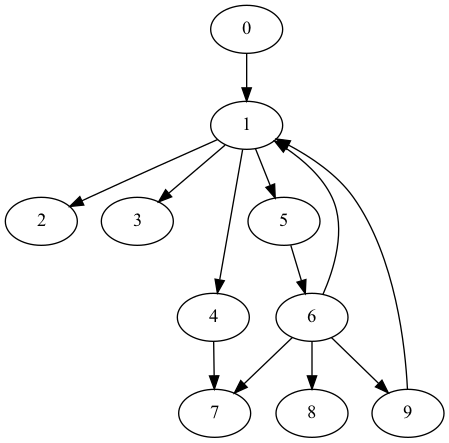

Starting BFS from node: 0
Processing Node:  0
	 Queued node: 1 Depth =  1  parent =  0
Done processing node:  0
Queue:  [1]
Processing Node:  1
	 Queued node: 2 Depth =  2  parent =  1
	 Queued node: 3 Depth =  2  parent =  1
	 Queued node: 4 Depth =  2  parent =  1
	 Queued node: 5 Depth =  2  parent =  1
Done processing node:  1
Queue:  [2, 3, 4, 5]
Processing Node:  2
Done processing node:  2
Queue:  [3, 4, 5]
Processing Node:  3
Done processing node:  3
Queue:  [4, 5]
Processing Node:  4
	 Queued node: 7 Depth =  3  parent =  4
Done processing node:  4
Queue:  [5, 7]
Processing Node:  5
	 Queued node: 6 Depth =  3  parent =  5
Done processing node:  5
Queue:  [7, 6]
Processing Node:  7
Done processing node:  7
Queue:  [6]
Processing Node:  6
	 Queued node: 8 Depth =  4  parent =  6
	 Queued node: 9 Depth =  4  parent =  6
Done processing node:  6
Queue:  [8, 9]
Processing Node:  8
Done processing node:  8
Queue:  [9]
Processing Node:  9
Done processing node:  9
Queue:  []
Ending BF

[0, 1, 4, 7]

In [28]:
myGraph = GraphWithBFSTraversal(10)
myGraph.add_edge(0,1)
myGraph.add_edge(1,2)
myGraph.add_edge(1,3)
myGraph.add_edge(1,4)
myGraph.add_edge(1,5)
myGraph.add_edge(5,6)
myGraph.add_edge(4,7)
myGraph.add_edge(6,7)
myGraph.add_edge(6,8)
myGraph.add_edge(6,9)
myGraph.add_edge(6,1)
myGraph.add_edge(9,1)
#display(HTML('<h2> The Graph </h2>'))
display(myGraph.display_graph())
myGraph.breadth_first_search(0, debug=True)
myGraph.get_shortest_path(0,9)
myGraph.get_shortest_path(0,7)

In [29]:
class GraphWithDFSTraversal(AdjListGraph):
    def __init__(self, n):
        AdjListGraph.__init__(self, n)
        self.__visited = None
        self.__dfs_discovery_time = None
        self.__dfs_finish_time = None
        self.__dfs_time = 0
        self.__dfs_parent = None
    
    def incr_time(self):
        self.__dfs_time = self.__dfs_time + 1
        
    def dfs_visit_node(self, s, debug):
        if self.__visited[s]:
            return
        self.incr_time()
        if debug:
            print('@Time %d => DFS Visit node:'% self.__dfs_time , s)
        self.__dfs_discovery_time[s] = self.__dfs_time
        self.__visited[s] = True
        
        adj_nodes = self.get_adjacent_nodes(s)
        for t in adj_nodes:
            if not self.__visited[t]: 
                self.__dfs_parent[t] = s
                self.dfs_visit_node(t, debug)
        self.incr_time()
        if debug:
            print('@Time %d => DFS Return from node:' % self.__dfs_time, s)
        self.__dfs_finish_time[s] = self.__dfs_time
    
    def is_dfs_forward_edge(self, d_i, f_i, d_j, f_j):
        return d_i < d_j < f_j < f_i 
    
    def is_dfs_back_edge(self, d_i, f_i, d_j, f_j):
        return d_j < d_i < f_i < f_j 
    
    def is_dfs_cross_edge(self, d_i, f_i, d_j, f_j):
        return (f_i < d_j) or (f_j < d_i)
    
    
    def dfs_visit_all(self, debug=False):
        self.__visited = [False] * self.n
        self.__dfs_discovery_time = [0] * self.n
        self.__dfs_finish_time = [0] * self.n
        self.__dfs_parent = [-1] * self.n
        self.__dfs_time = 0
        for i in range(self.n):
            self.dfs_visit_node(i, debug)
        if debug:
            self.dfs_write_debug_info()
            
            
    def dfs_write_debug_info(self):
        # Write out the discovery and finish times in a HTML table
        html_str = '<h2> Discovery and Finish Times </h2> <table><tbody><tr><td> Node ID <td> Discovery Time <td> Finish Time </tr>'
        for i in range(self.n):
            html_str = html_str + '<tr><td> %d <td> %d <td> %d </tr>'%(i, self.__dfs_discovery_time[i], self.__dfs_finish_time[i])
        display(HTML(html_str))

        # Display the DFS Tree using pygraphviz
        T = AGraph(directed='True')
        for i in range(self.n):
            T.add_node(i)
        for j in range(self.n):
            if self.__dfs_parent[j] >= 0:
                T.add_edge(self.__dfs_parent[j], j)
        T.layout(prog='dot')
        display(HTML('<h2> DFS Tree </h2>'))
        display(Image(T.draw(format='png')))
        display(HTML('<h2> Classification of Edges </h2>'))
        html_str = '<table> <tbody> <tr> <td> Edge <td> Classification </tr>'

        for i in range(self.n):
            adj_list = self.get_adjacent_nodes(i)
            for j in adj_list:
                cls_str = 'Unknown'
                if self.__dfs_parent[j] == i: 
                    cls_str = 'Tree Edge'
                elif self.is_dfs_back_edge(self.__dfs_discovery_time[i], self.__dfs_finish_time[i], 
                                           self.__dfs_discovery_time[j], self.__dfs_finish_time[j]):
                    cls_str = 'Back Edge'
                elif self.is_dfs_forward_edge(self.__dfs_discovery_time[i], self.__dfs_finish_time[i], 
                                              self.__dfs_discovery_time[j], self.__dfs_finish_time[j]):
                    cls_str = 'Forward Edge'
                elif self.is_dfs_cross_edge(self.__dfs_discovery_time[i], self.__dfs_finish_time[i], 
                                              self.__dfs_discovery_time[j], self.__dfs_finish_time[j]):
                    cls_str = 'Cross Edge'
                html_str = html_str + '<tr> <td> (%d, %d) <td> %s' % (i, j, cls_str)
        display(HTML(html_str))
        

0 [1]
1 [2, 3, 4, 5]
2 []
3 []
4 [7]
5 [6]
6 [7, 8, 9, 1]
7 []
8 []
9 [1]


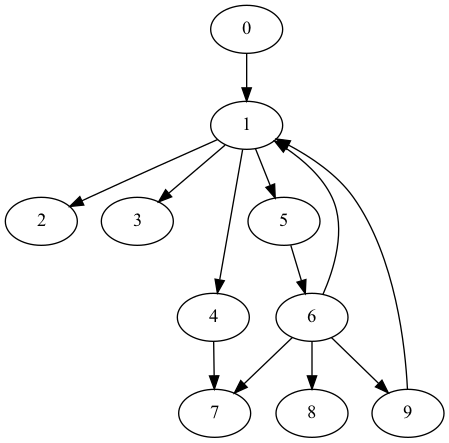

@Time 1 => DFS Visit node: 0
@Time 2 => DFS Visit node: 1
@Time 3 => DFS Visit node: 2
@Time 4 => DFS Return from node: 2
@Time 5 => DFS Visit node: 3
@Time 6 => DFS Return from node: 3
@Time 7 => DFS Visit node: 4
@Time 8 => DFS Visit node: 7
@Time 9 => DFS Return from node: 7
@Time 10 => DFS Return from node: 4
@Time 11 => DFS Visit node: 5
@Time 12 => DFS Visit node: 6
@Time 13 => DFS Visit node: 8
@Time 14 => DFS Return from node: 8
@Time 15 => DFS Visit node: 9
@Time 16 => DFS Return from node: 9
@Time 17 => DFS Return from node: 6
@Time 18 => DFS Return from node: 5
@Time 19 => DFS Return from node: 1
@Time 20 => DFS Return from node: 0


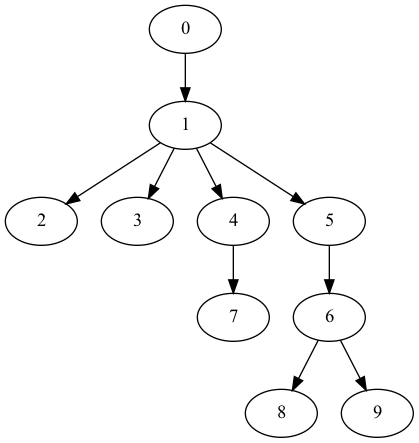

In [30]:
myGraph = GraphWithDFSTraversal(10)
myGraph.add_edge(0,1)
myGraph.add_edge(1,2)
myGraph.add_edge(1,3)
myGraph.add_edge(1,4)
myGraph.add_edge(1,5)
myGraph.add_edge(5,6)
myGraph.add_edge(4,7)
myGraph.add_edge(6,7)
myGraph.add_edge(6,8)
myGraph.add_edge(6,9)
myGraph.add_edge(6,1)
myGraph.add_edge(9,1)
display(HTML('<h2> The Graph </h2>'))
display(myGraph.display_graph())
myGraph.dfs_visit_all(debug = True)